# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [ ]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정
UTILS = "/content/resources/utils"   # git clone 경로
FIGS  = os.path.join(BASE, "figures")
os.makedirs(FIGS, exist_ok=True)

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [ ]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


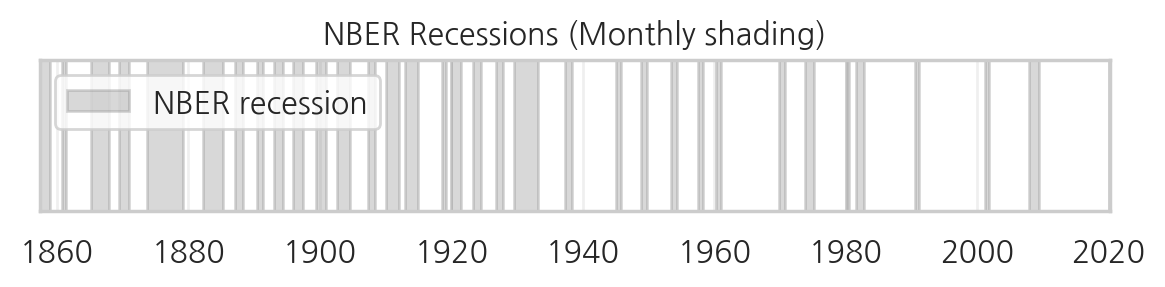

In [ ]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 인플레이션: 뉴질랜드, 영국, 캐나다, 스웨덴, 핀란드

In [ ]:
# Inflation, consumer prices for New Zealand (FPCPITOTLZGNZL)
# Inflation, consumer prices for Canada (FPCPITOTLZGCAN)
# Inflation, consumer prices for the United Kingdom (FPCPITOTLZGGBR)
# Inflation, consumer prices for Sweden (FPCPITOTLZGSWE)
# Inflation, consumer prices for Finland (FPCPITOTLZGFIN)

var_list = ['FPCPITOTLZGNZL', 'FPCPITOTLZGCAN', 'FPCPITOTLZGGBR','FPCPITOTLZGSWE','FPCPITOTLZGFIN']
start = date(1981,1,1)
end = date(2024,12,31)

df_inf = pdr.get_data_fred(var_list, start=start, end=end)
print(df_inf.head())
print(df_inf.tail(3))

print(df_inf.info())

            FPCPITOTLZGNZL  FPCPITOTLZGCAN  FPCPITOTLZGGBR  FPCPITOTLZGSWE  \
DATE                                                                         
1981-01-01          15.370          12.472          11.877          12.104   
1982-01-01          16.164          10.769           8.599           8.589   
1983-01-01           7.341           5.864           4.609           8.873   
1984-01-01           6.171           4.305           4.961           8.044   
1985-01-01          15.418           3.962           6.071           7.373   

            FPCPITOTLZGFIN  
DATE                        
1981-01-01          11.306  
1982-01-01           9.585  
1983-01-01           8.366  
1984-01-01           7.068  
1985-01-01           5.196  
            FPCPITOTLZGNZL  FPCPITOTLZGCAN  FPCPITOTLZGGBR  FPCPITOTLZGSWE  \
DATE                                                                         
2022-01-01           7.172           6.803           7.922           8.369   
2023-01-01      

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/start_inf_targeting.png


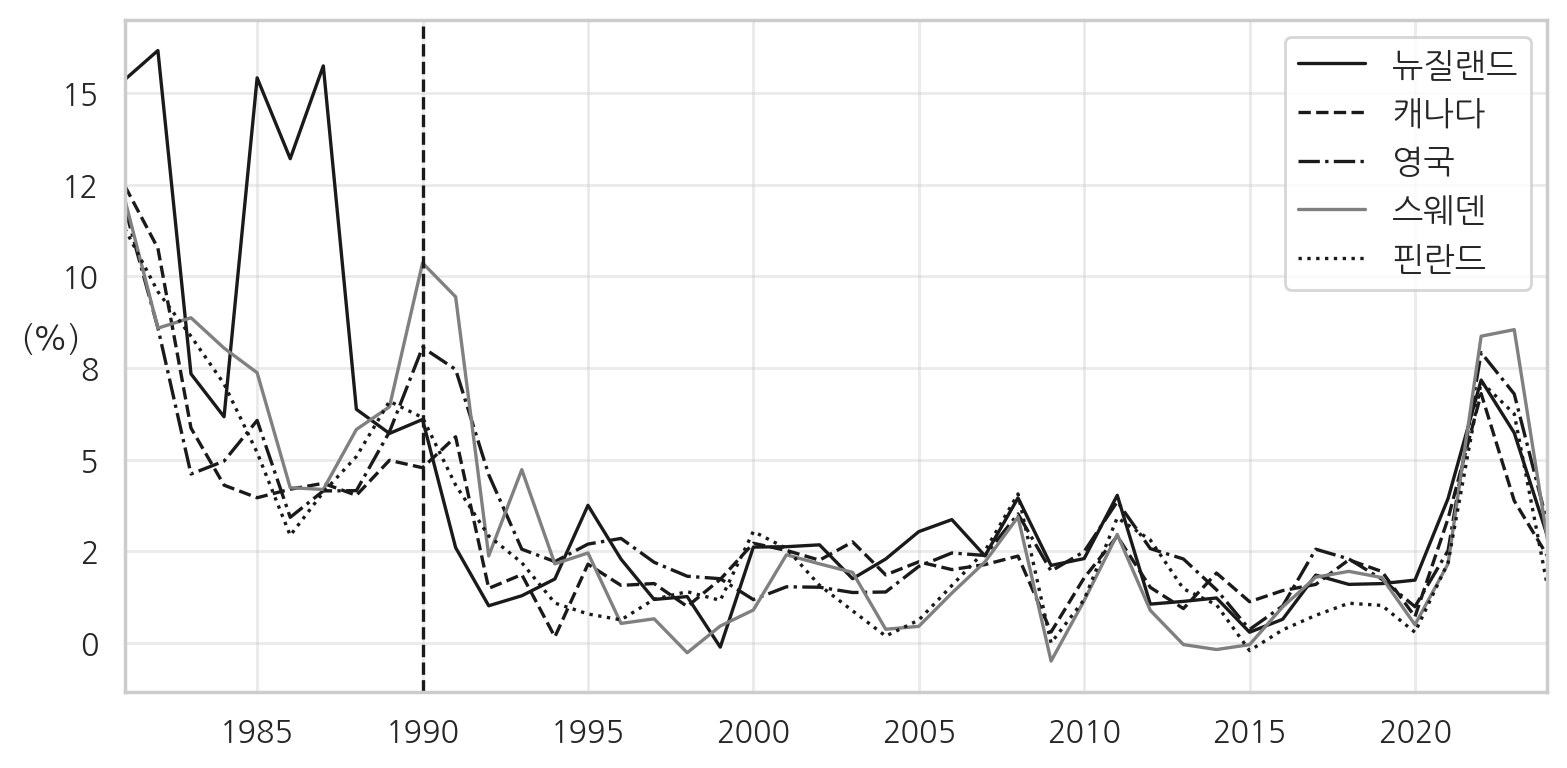

In [ ]:
start_date = 1981
end_date = 2024

fig, ax = plt.subplots(figsize=(8,4))

df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGNZL'].plot(
    ax=ax, color='k', linewidth=1.2
)
df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGCAN'].plot(
    ax=ax, color='k', linestyle='--', linewidth=1.2
)
df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGGBR'].plot(
    ax=ax, color='k', linestyle='-.', linewidth=1.2
)
df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGSWE'].plot(
    ax=ax, color='gray', linewidth=1.2
)
df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGFIN'].plot(
    ax=ax, color='k', linestyle=':', linewidth=1.2
)

ax.legend(
    ['뉴질랜드','캐나다','영국','스웨덴','핀란드'],
    fontsize=12,
    loc='upper right'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

# 수직선 (인플레이션 타기팅 도입 시점 예시)
ax.axvline(pd.Timestamp('1990-03'), color='k', linestyle='--', linewidth=1.2)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('start_inf_targeting')
plt.show()


## 각종 인플레이션 지표: 한국의 경우
- ECOS 통계 코드 검색: https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch

In [ ]:
def ECOS_generate_TS_monthly(df, varlist):
    '''
    ECOS에서 불러 온 df에서 원하는 변수로만 df로 만들기 (monthly 경우)
    df: api.get_statistic_search로 불러온 df
    varlist: 원하는 변수 리스트 (예: ['CP(91일)', '국고채(3년)'])
    '''
    df = df.loc[df['통계항목명1'].isin(varlist)]
    df = df.loc[:, ['통계항목명1', '시점', '값']]
    df['시점'] = pd.to_datetime(df['시점'], format='%Y%m', errors='coerce')
    df = df.sort_values(by=['통계항목명1', '시점'])
    df = pd.pivot(df, index='시점', columns='통계항목명1', values='값')
    df = df.astype(float)
    return df

def ECOS_generate_TS_quarterly(df, varlist):
    '''
    ECOS에서 불러 온 df에서 원하는 변수로만 df로 만들기 (quarterly 경우)
    df: api.get_statistic_search로 불러온 df
    varlist: 원하는 변수 리스트 (예: ['CP(91일)', '국고채(3년)'])
    '''
    df = df.loc[df['통계항목명1'].isin(varlist)]
    df = df.loc[:, ['통계항목명1', '시점', '값']]

    df['시점'] = df['시점'].str.replace('Q', '', regex=True)  # Remove 'Q' if present
    df['연도'] = df['시점'].str[:4].astype(int)  # Extract year
    df['분기'] = df['시점'].str[4:].astype(int)  # Extract quarter
    df['시점'] = pd.to_datetime(df['연도'].astype(str) + '-' + (df['분기'] * 3 - 2).astype(str) + '-01')
    df = df.drop(columns=['연도', '분기'])  # Drop intermediate columns

    df = df.sort_values(by=['통계항목명1', '시점'])
    df = pd.pivot(df, index='시점', columns='통계항목명1', values='값')
    df = df.astype(float)

    return df

In [ ]:
# API key
key_api = key_api_ECOS
service_key = key_api
api = Ecos(service_key)

### 인플레이션: CPI, 근원, 생활물가

In [ ]:
date_start = '201101'
date_end = '202501'

df = api.get_statistic_search(통계표코드="901Y010", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)
df

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,...,통계항목명4,단위,WGT,시점,값
0,901Y010,4.2.2. 소비자물가지수(특수분류),00,총지수,None,...,None,2020=100,1000,201101,88.288
1,901Y010,4.2.2. 소비자물가지수(특수분류),10,신선식품 1),None,...,None,2020=100,37.9,201101,88.9
2,901Y010,4.2.2. 소비자물가지수(특수분류),11,신선어개,None,...,None,2020=100,9.3,201101,81.123
3,901Y010,4.2.2. 소비자물가지수(특수분류),110,생활물가지수 4),None,...,None,2020=100,528.4,201101,90.44
4,901Y010,4.2.2. 소비자물가지수(특수분류),12,신선채소,None,...,None,2020=100,14.2,201101,89.778
...,...,...,...,...,...,...,...,...,...,...,...
5742,901Y010,4.2.2. 소비자물가지수(특수분류),223,개인서비스,None,...,None,2020=100,333.3,202501,118.73
5743,901Y010,4.2.2. 소비자물가지수(특수분류),2231,외식,None,...,None,2020=100,138,202501,122.89
5744,901Y010,4.2.2. 소비자물가지수(특수분류),2239,외식제외개인서비스,None,...,None,2020=100,195.3,202501,115.84
5745,901Y010,4.2.2. 소비자물가지수(특수분류),DB,식료품 및 에너지제외 지수 3),None,...,None,2020=100,782.2,202501,112.14


In [ ]:
varlist = ['총지수','농산물및석유류제외지수 2)','식료품 및 에너지제외 지수 3)','생활물가지수 4)']
df_inf = ECOS_generate_TS_monthly(df,varlist)
df_inf.tail()

통계항목명1,농산물및석유류제외지수 2),생활물가지수 4),식료품 및 에너지제외 지수 3),총지수
시점,,,,
2024-09-01,112.870,117.450,111.180,114.650
2024-10-01,113.160,117.510,111.390,114.690
2024-11-01,113.190,117.060,111.440,114.400
2024-12-01,113.460,117.340,111.590,114.910
2025-01-01,113.980,118.520,112.140,115.710


In [ ]:
df_inf.columns = ['근원(농산물 및 석유류 제외)','생활물가','근원','CPI']

df_inf = 100*df_inf.pct_change(12)
df_inf = df_inf.dropna()

df_inf.tail(2)

,근원(농산물 및 석유류 제외),생활물가,근원,CPI
시점,,,,
2024-12-01,1.849,2.177,1.816,1.934
2025-01-01,2.023,2.544,1.936,2.244


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/inf_trend_kor.png


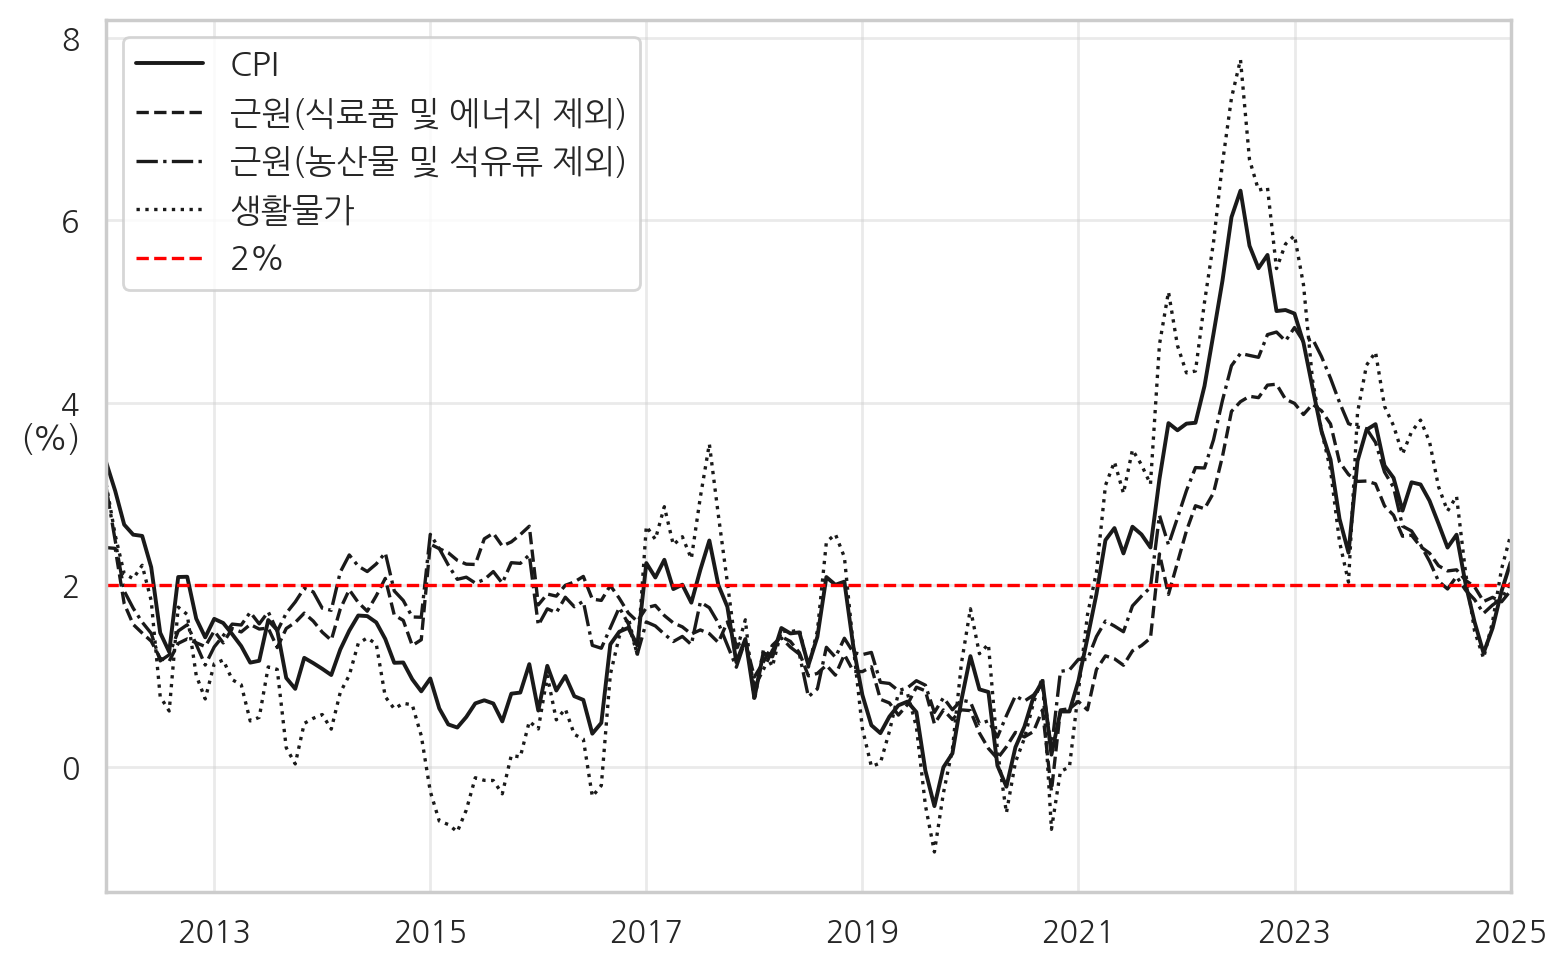

In [ ]:
start_date = 2012
end_date = 2025

linewidth = 1.2

fig, ax = plt.subplots(figsize=(8,5))

df_inf.loc[str(start_date):str(end_date), 'CPI'].plot(
    ax=ax, color='k', linewidth=1.4
)
df_inf.loc[str(start_date):str(end_date), '근원'].plot(
    ax=ax, color='k', linestyle='--', linewidth=linewidth
)
df_inf.loc[str(start_date):str(end_date), '근원(농산물 및 석유류 제외)'].plot(
    ax=ax, color='k', linestyle='-.', linewidth=linewidth
)
df_inf.loc[str(start_date):str(end_date), '생활물가'].plot(
    ax=ax, color='k', linestyle=':', linewidth=linewidth
)

# 목표선
ax.axhline(
    2, color='red', linestyle='--', linewidth=linewidth, label='목표 2%'
)

ax.legend(
    ['CPI',
     '근원(식료품 및 에너지 제외)',
     '근원(농산물 및 석유류 제외)',
     '생활물가',
     '2%'],
    fontsize=12,
    loc='upper left'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('inf_trend_kor')
plt.show()

### 인플레이션(CPI, 근원, 생활), 기대 인플레이션

In [ ]:
date_start = '201101'
date_end = '202501'
df = api.get_statistic_search(통계표코드="511Y003", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)
df

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,...,통계항목명4,단위,WGT,시점,값
0,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMB,향후1년 기대인플레이션율,None,...,None,%,None,201101,3.6
1,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMBGA,-0.5~1.5%,None,...,None,%,None,201101,1.2
2,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMBGB,1.5~2.0%,None,...,None,%,None,201101,3.6
3,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMBGC,2.0~2.5%,None,...,None,%,None,201101,7.4
4,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMBGD,2.5~3.0%,None,...,None,%,None,201101,9
...,...,...,...,...,...,...,...,...,...,...,...
3515,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMDHE,3~4%,None,...,None,%,None,202501,17.1
3516,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMDHF,4~5%,None,...,None,%,None,202501,7.8
3517,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMDHG,5~6%,None,...,None,%,None,202501,5.7
3518,511Y003,"6.2.3. 기대인플레이션율(전국, 월)",FMDHH,>6%,None,...,None,%,None,202501,6.2


In [ ]:
varlist = ['향후1년 기대인플레이션율','3년후 기대인플레이션율','5년후 기대인플레이션율']
df_exp = ECOS_generate_TS_monthly(df,varlist)
df_exp.head(3)

통계항목명1,3년후 기대인플레이션율,5년후 기대인플레이션율,향후1년 기대인플레이션율
시점,,,
2011-01-01,NaN,NaN,3.600
2011-02-01,NaN,NaN,3.700
2011-03-01,NaN,NaN,3.900


In [ ]:
df_exp.columns = ['3년 후 기대 인플레이션','5년 후 기대 인플레이션','1년 후 기대 인플레이션']

<Axes: xlabel='시점'>

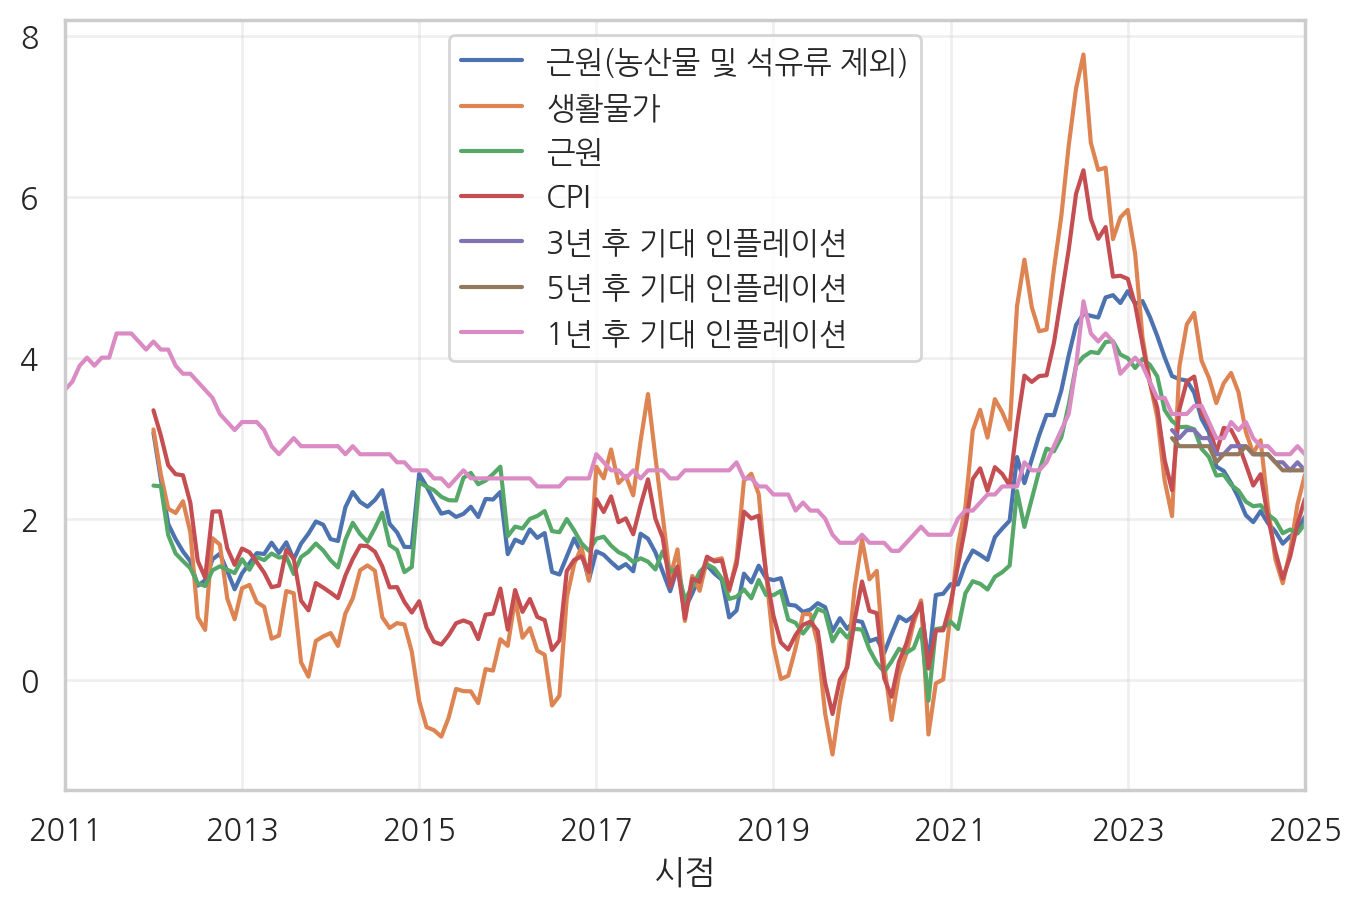

In [ ]:
inf_all = pd.concat([df_inf, df_exp], axis=1)
inf_all.plot()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/inf_trend_exp_kor.png


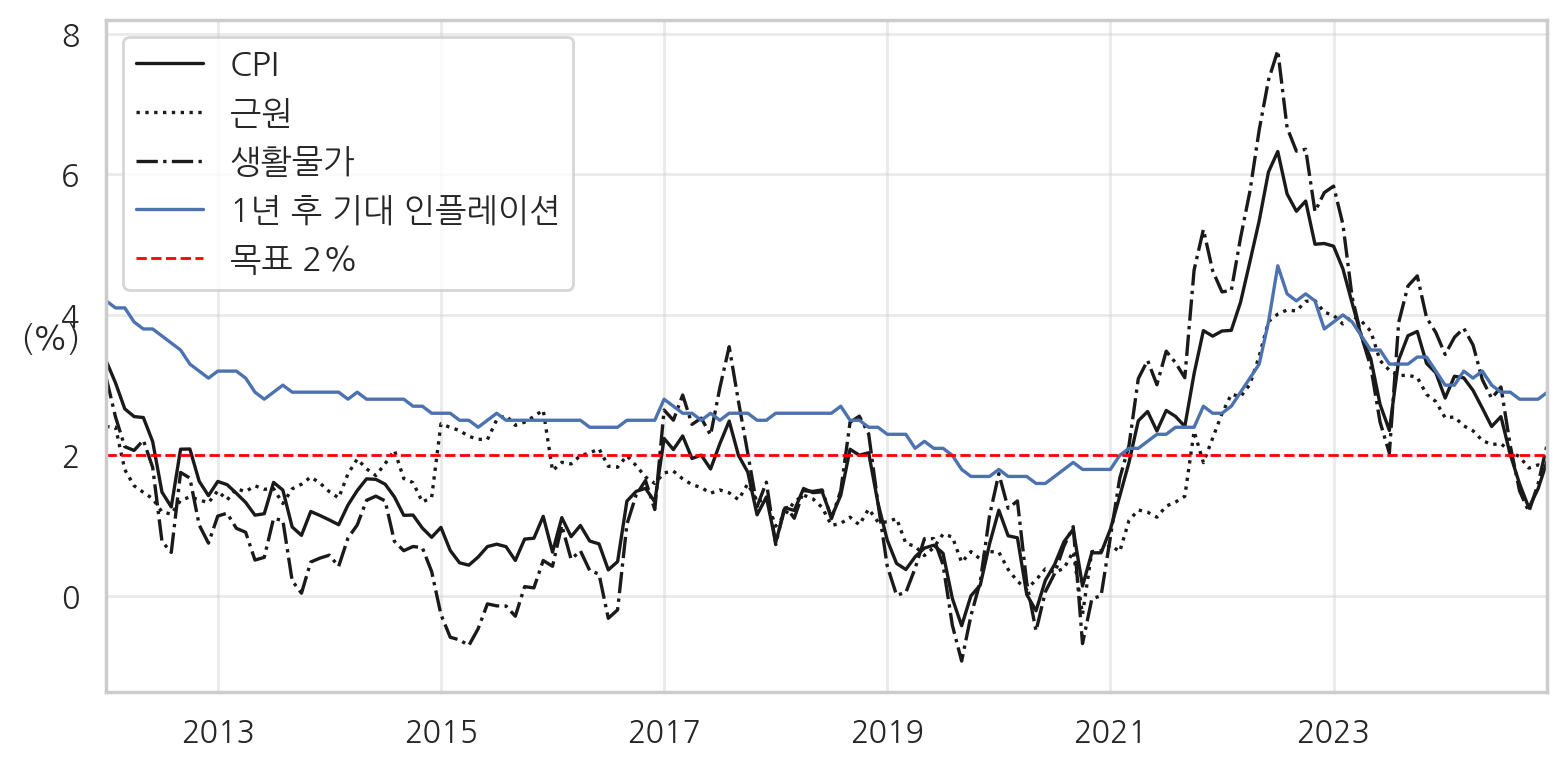

In [ ]:
start_date = 2012
end_date = 2024

linewidth = 1.2

fig, ax = plt.subplots(figsize=(8,4))

inf_all.loc[str(start_date):str(end_date), 'CPI'].plot(
    ax=ax, color='k', linewidth=linewidth
)
inf_all.loc[str(start_date):str(end_date), '근원'].plot(
    ax=ax, color='k', linestyle=':', linewidth=linewidth
)
inf_all.loc[str(start_date):str(end_date), '생활물가'].plot(
    ax=ax, color='k', linestyle='-.', linewidth=linewidth
)
inf_all.loc[str(start_date):str(end_date), '1년 후 기대 인플레이션'].plot(
    ax=ax, linewidth=linewidth
)

# 목표선
ax.axhline(
    2, color='red', linestyle='--', linewidth=1, label='목표 2%'
)

ax.legend(
    ['CPI','근원','생활물가','1년 후 기대 인플레이션','목표 2%'],
    fontsize=12,
    loc='upper left'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('inf_trend_exp_kor')
plt.show()

In [ ]:
# 상관계수
inf_all.loc[:,['CPI','근원','생활물가','1년 후 기대 인플레이션']].corr()

,CPI,근원,생활물가,1년 후 기대 인플레이션
CPI,1.000,0.774,0.974,0.743
근원,0.774,1.000,0.668,0.752
생활물가,0.974,0.668,1.000,0.607
1년 후 기대 인플레이션,0.743,0.752,0.607,1.000


## 기조적 물가지표: 미국의 경우

In [ ]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
# Personal Consumption Expenditures: Chain-type Price Index (PCEPI)
# Median Consumer Price Index (MEDCPIM159SFRBCLE)
# Sticky Price Consumer Price Index (STICKCPIM159SFRBATL)
# 16% Trimmed-Mean Consumer Price Index (TRMMEANCPIM159SFRBCLE)

var_list = ['CPIAUCSL', 'PCEPI', 'MEDCPIM159SFRBCLE','STICKCPIM159SFRBATL','TRMMEANCPIM159SFRBCLE']
start = date(2006,1,1)
end = date(2024,12,31)

df_trend = pdr.get_data_fred(var_list, start=start, end=end)

print(df_trend.tail(3))
print(df_trend.info())

            CPIAUCSL   PCEPI  MEDCPIM159SFRBCLE  STICKCPIM159SFRBATL  \
DATE                                                                   
2024-10-01   315.564 124.494              4.013                3.924   
2024-11-01   316.449 124.637              3.822                3.835   
2024-12-01   317.603 124.979              3.742                3.710   

            TRMMEANCPIM159SFRBCLE  
DATE                               
2024-10-01                  3.155  
2024-11-01                  3.180  
2024-12-01                  3.156  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 2006-01-01 to 2024-12-01
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CPIAUCSL               228 non-null    float64
 1   PCEPI                  228 non-null    float64
 2   MEDCPIM159SFRBCLE      228 non-null    float64
 3   STICKCPIM159SFRBATL    228 non-null    float64
 4   TRMMEANCPIM159SFRBC

In [ ]:
df_trend.columns = ['CPI','PCE','median','sticky','trimmed']

# CPI, PCE는 전년대비 증가율로 변환
df_trend['CPI'] = 100*df_trend['CPI'].pct_change(12)
df_trend['PCE'] = 100*df_trend['PCE'].pct_change(12)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/inf_trend.png


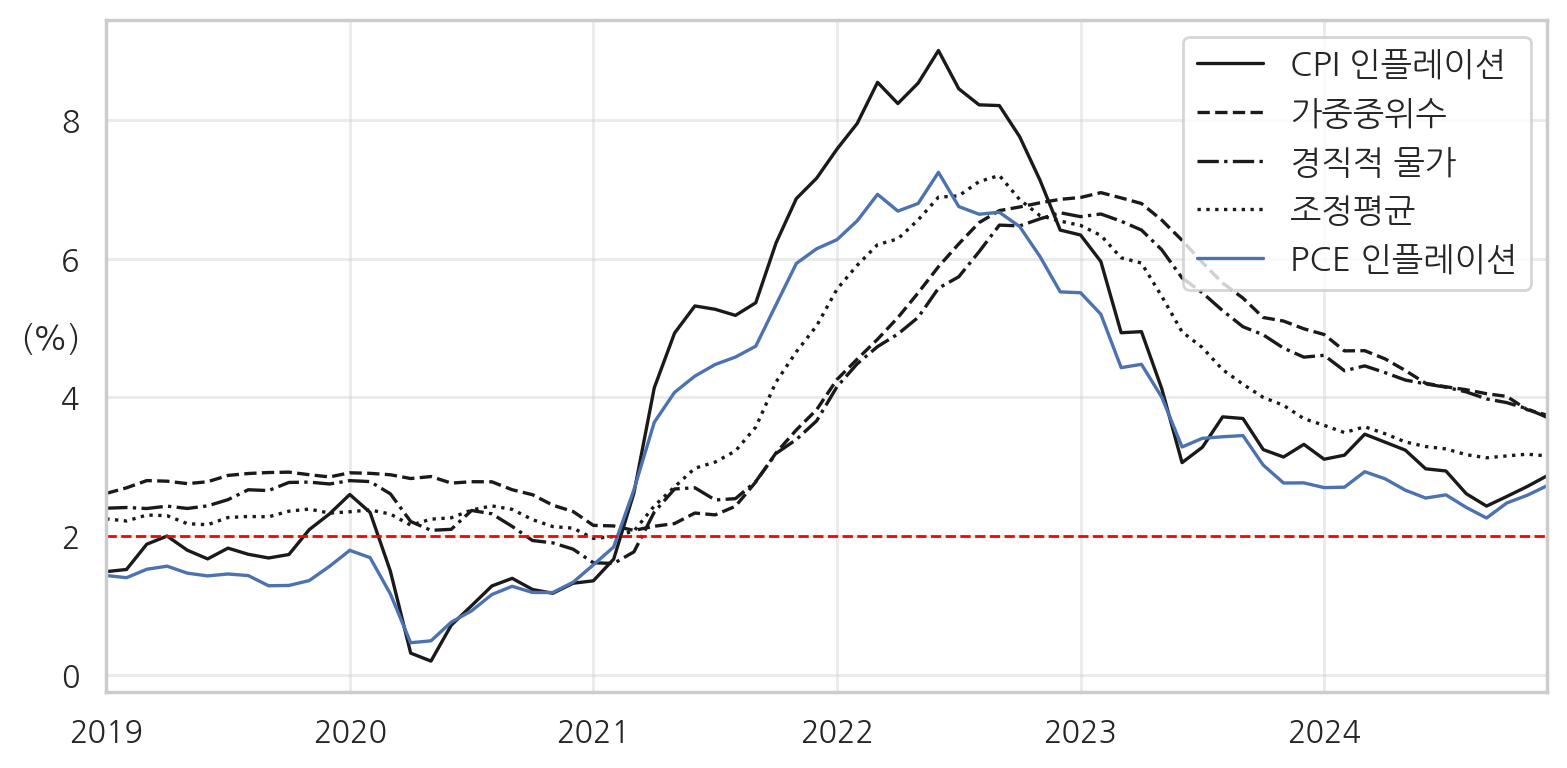

In [ ]:
start_date = 2019
end_date = 2024

linewidth = 1.2

fig, ax = plt.subplots(figsize=(8,4))

df_trend.loc[str(start_date):str(end_date), 'CPI'].plot(
    ax=ax, color='k', linewidth=linewidth
)
df_trend.loc[str(start_date):str(end_date), 'median'].plot(
    ax=ax, color='k', linestyle='--', linewidth=linewidth
)
df_trend.loc[str(start_date):str(end_date), 'sticky'].plot(
    ax=ax, color='k', linestyle='-.', linewidth=linewidth
)
df_trend.loc[str(start_date):str(end_date), 'trimmed'].plot(
    ax=ax, color='k', linestyle=':', linewidth=linewidth
)
df_trend.loc[str(start_date):str(end_date), 'PCE'].plot(
    ax=ax, linewidth=linewidth
)

ax.legend(
    ['CPI 인플레이션','가중중위수','경직적 물가','조정평균','PCE 인플레이션'],
    fontsize=12,
    loc='upper right'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

# 목표선
ax.axhline(2, color='red', linestyle='--', linewidth=1, label='목표 2%')

# NBER 경기침체 음영 (월자료)
plot_nber_recession(ax, NBERm)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('inf_trend')
plt.show()


## 인플레이션 목표제 vs. 물가수준 목표제

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/IT.png


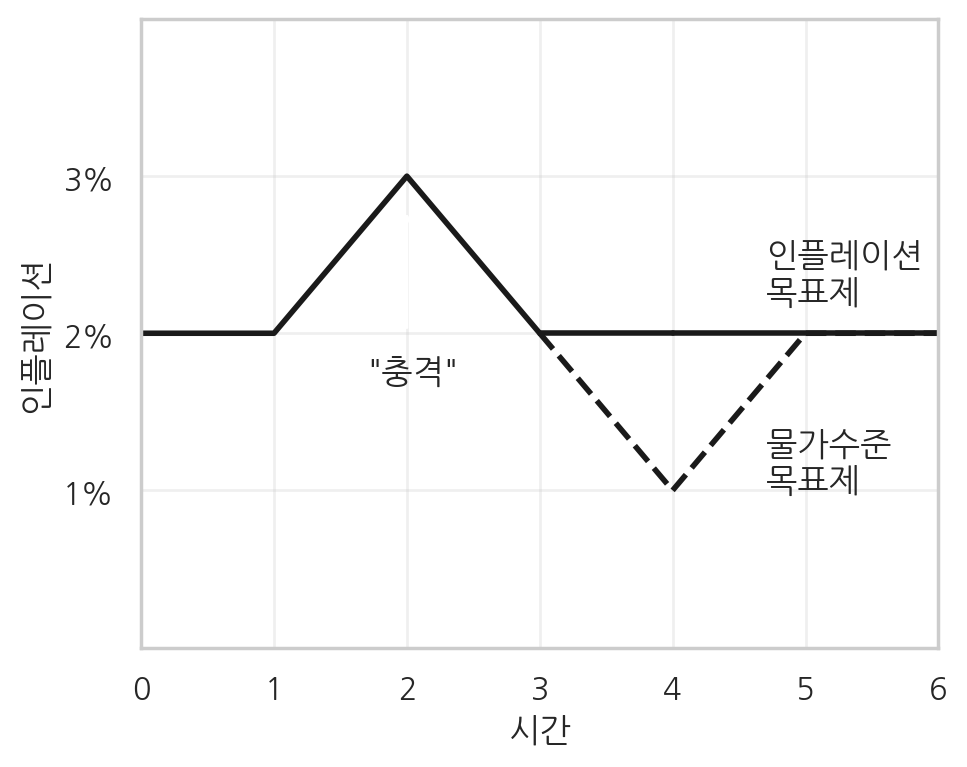

In [ ]:
# First Figure: Inflation Rate
plt.figure(figsize=(5, 4))
time1 = np.array([0, 1, 2, 3, 4, 5, 6])
inflation_target = np.array([2, 2, 3, 2, 2, 2, 2])
price_level_target = np.array([2, 2, 3, 2, 1, 2, 2])

# Plot lines for first graph
plt.plot(time1[:4], inflation_target[:4], 'k-', linewidth=2)
plt.plot(time1[3:5], inflation_target[3:5], 'k-', linewidth=2)
plt.plot(time1[4:], inflation_target[4:], 'k-', linewidth=2)
plt.plot(time1[3:5], price_level_target[3:5], 'k--', linewidth=2)
plt.plot(time1[4:], price_level_target[4:], 'k--', linewidth=2)

# Add labels for first plot
plt.xlabel('시간')
plt.ylabel('인플레이션')
plt.ylim(0, 4)
plt.xlim(0, 6)
plt.xticks(range(7))
plt.yticks([1, 2, 3])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}%'))

# Add text annotations for first plot
plt.text(4.7, 2.2, '인플레이션\n목표제', fontsize=12)
plt.text(4.7, 1.0, '물가수준\n목표제', fontsize=12)
plt.text(1.7, 1.7, '"충격"', fontsize=12)
plt.annotate('', xy=(2, 2.8), xytext=(2, 2),
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
save_fig('IT')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/PLT.png


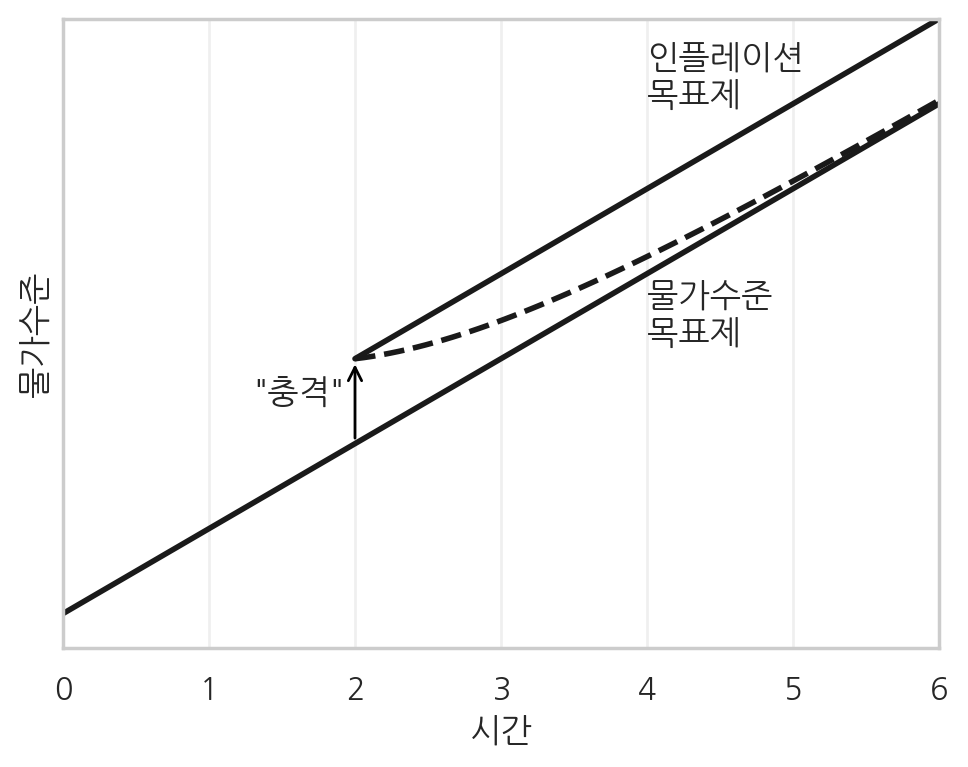

In [ ]:
# Second Figure: Price Level
plt.figure(figsize=(5,4))

# Create time points
time = np.linspace(0, 6, 100)

# Create base trend line (price-level targeting)
base_trend = 0.5 * time + 1

# Create the diverging trends after shock point
shock_point = 2
shock_index = int(len(time) * shock_point/6)

# Inflation targeting line (continues higher after shock)
inflation_target = np.concatenate([
    base_trend[:shock_index],
    base_trend[shock_index:] + 0.5
])

# Price-level targeting line (gradually returns to trend)
price_level_target = np.concatenate([
    base_trend[:shock_index],
    base_trend[shock_index:] + 0.5 * np.exp(-0.8 * (time[shock_index:] - shock_point))
])

# Plot the lines
plt.plot(time, base_trend, 'k-', linewidth=2)
plt.plot(time[shock_index:], inflation_target[shock_index:], 'k-', linewidth=2)
plt.plot(time[shock_index:], price_level_target[shock_index:], 'k--', linewidth=2)

# Add shock arrow
arrow_x = shock_point
arrow_base_y = base_trend[shock_index]
arrow_height = 0.5
plt.annotate('', xy=(arrow_x, arrow_base_y + arrow_height),
            xytext=(arrow_x, arrow_base_y),
            arrowprops=dict(arrowstyle='->', color='black'))
plt.text(arrow_x - 0.7, arrow_base_y + arrow_height/2, '"충격"', fontsize=12)

# Add labels for targeting types
plt.text(4, 4, '인플레이션\n목표제', fontsize=12)
plt.text(4, 2.6, '물가수준\n목표제', fontsize=12)

# Set up axes and labels
plt.xlabel('시간')
plt.ylabel('물가수준')
plt.xlim(0, 6)
plt.ylim(0.8, 4.5)
plt.xticks(range(0, 7))

# Remove both ticks and numbers from y-axis while keeping the label
plt.gca().yaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])

plt.tight_layout()
save_fig('PLT')
plt.show()

## 헤드라인 PCE, 근원 PCE 인플레이션: 미국의 경우

In [ ]:
# Personal Consumption Expenditures: Chain-type Price Index (PCEPI)
# Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index) (PCEPILFE)

var_list = ['PCEPI', 'PCEPILFE']
start = date(1998,1,1)
end = date(2024,12,31)

df_pce = pdr.get_data_fred(var_list, start=start, end=end)
df_pce = 100*df_pce.pct_change(12)
df_pce = df_pce.dropna()

df_pce.columns = ['PCE','근원 PCE']

df_pce.tail(3)

,PCE,근원 PCE
DATE,,
2024-10-01,2.478,2.987
2024-11-01,2.588,2.981
2024-12-01,2.728,2.989


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/pce_trend.png


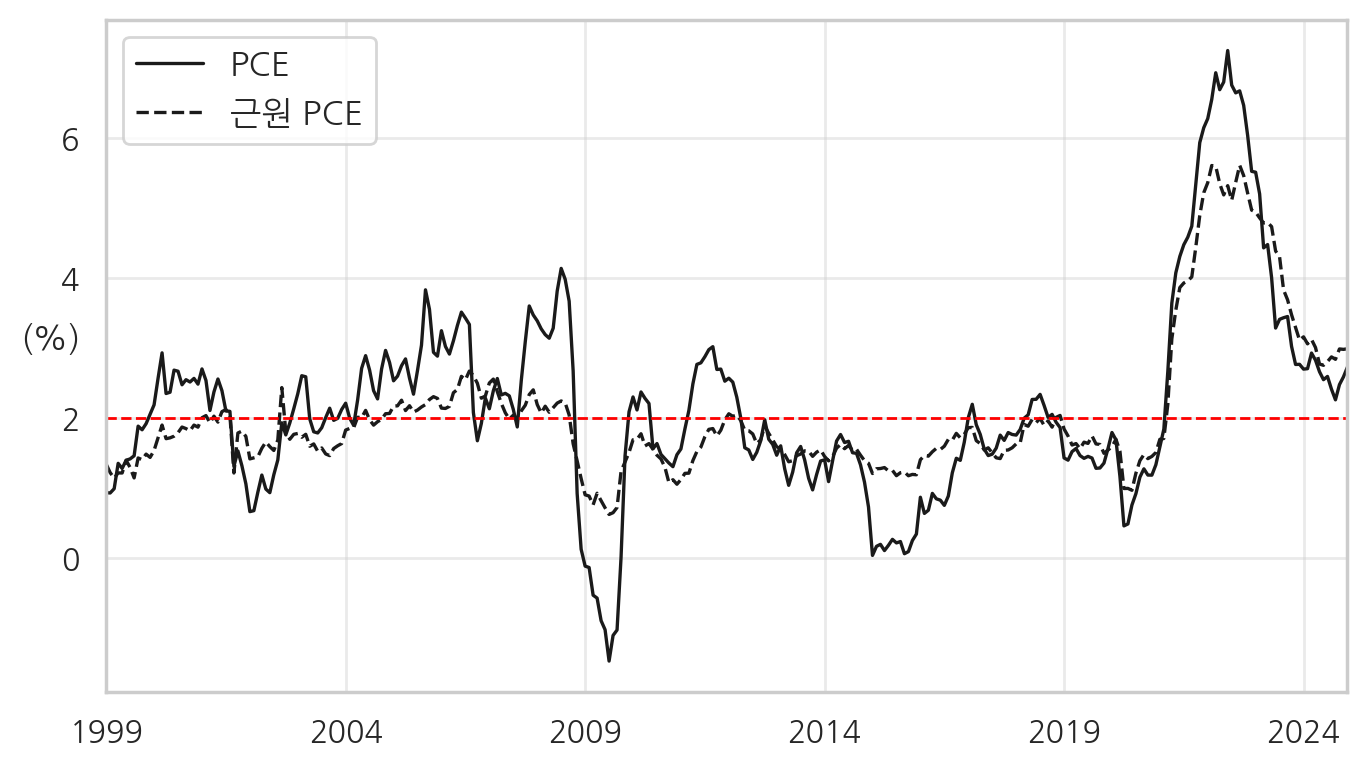

In [ ]:
linewidth = 1.2

fig, ax = plt.subplots(figsize=(7,4))

df_pce.loc[:, 'PCE'].plot(
    ax=ax, color='k', linewidth=linewidth
)
df_pce.loc[:, '근원 PCE'].plot(
    ax=ax, color='k', linestyle='--', linewidth=linewidth
)

ax.legend(
    ['PCE','근원 PCE'],
    fontsize=12,
    loc='upper left'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

# 목표선
ax.axhline(
    2, color='red', linestyle='--', linewidth=1, label='목표 2%'
)

# NBER 경기침체 음영
plot_nber_recession(ax, NBERm)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('pce_trend')
plt.show()


## 트릴레마, impossible trinity

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/impossible_trinity.png


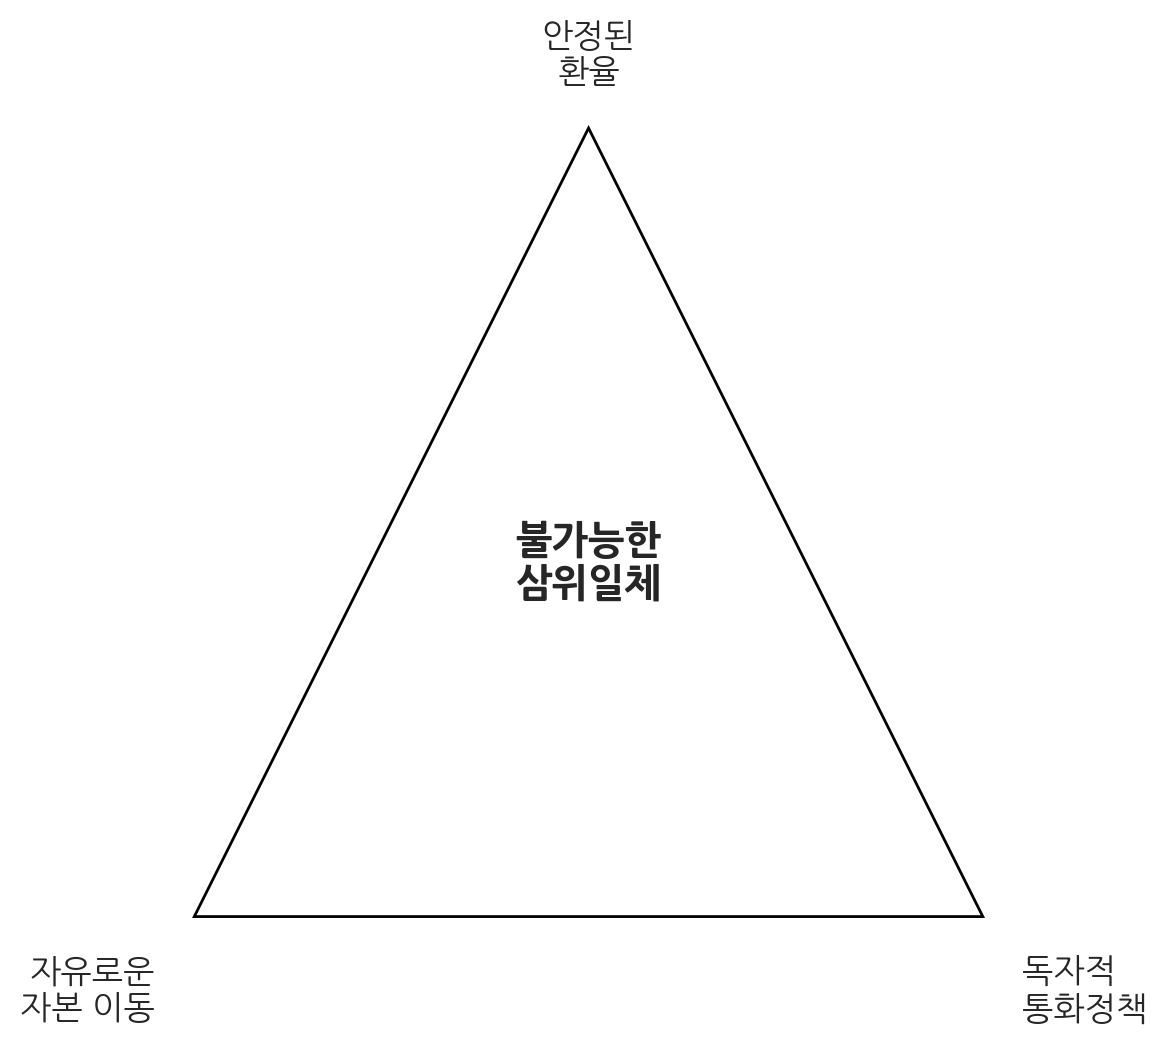

In [ ]:
def draw_impossible_trinity():
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')

    # Turn off axis
    ax.axis('off')

    # Define triangle vertices (inverted)
    vertices = np.array([[0, 2], [-2, -2], [2, -2]])  # Triangle points

    # Draw triangle
    triangle = plt.Polygon(vertices, fill=False, color='black')
    ax.add_patch(triangle)

    # Add main text in the center
    ax.text(0, -0.2, '불가능한\n삼위일체',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=14,
            fontweight='bold')

    # Add Korean labels at vertices
    # Top vertex
    ax.text(0, 2.2, '안정된\n환율',
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=12)

    # Bottom left vertex
    ax.text(-2.2, -2.2, '자유로운\n자본 이동',
            horizontalalignment='right',
            verticalalignment='top',
            fontsize=12)

    # Bottom right vertex
    ax.text(2.2, -2.2, '독자적\n통화정책',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=12)


    # Set limits with padding
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)

    return fig

# Create and show the plot
fig = draw_impossible_trinity()
save_fig('impossible_trinity')

plt.show()

## 연습문제

### 미국 PCE 인플레이션, 1년 기대 인플레이션

In [ ]:
# Personal Consumption Expenditures: Chain-type Price Index (PCEPI)
# Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index) (PCEPILFE)
# University of Michigan: Inflation Expectation (MICH)
# 1-Year Expected Inflation (EXPINF1YR)
# 3-Year Expected Inflation (EXPINF1YR)
# 5-Year Expected Inflation (EXPINF1YR)

var_list = ['PCEPI', 'PCEPILFE','MICH','EXPINF1YR','EXPINF3YR','EXPINF5YR']
start = date(2011,1,1)
end = date(2025,1,31)

df_exp1y = pdr.get_data_fred(var_list, start=start, end=end)

df_exp1y.loc[:,['PCEPI','PCEPILFE']] = 100*df_exp1y.loc[:,['PCEPI','PCEPILFE']].pct_change(12)
df_exp1y = df_exp1y.dropna()
df_exp1y.columns = ['PCE','근원 PCE','미시건 기대 인플레이션','1년 후 기대 인플레이션','3년 후 기대 인플레이션','5년 후 기대 인플레이션']
df_exp1y.tail(3)

,PCE,근원 PCE,미시건 기대 인플레이션,1년 후 기대 인플레이션,3년 후 기대 인플레이션,5년 후 기대 인플레이션
DATE,,,,,,
2024-11-01,2.588,2.981,2.600,2.432,2.369,2.333
2024-12-01,2.728,2.989,2.800,2.650,2.422,2.350
2025-01-01,2.607,2.780,3.300,2.627,2.504,2.459


In [ ]:
df_exp1y.corr()

,PCE,근원 PCE,미시건 기대 인플레이션,1년 후 기대 인플레이션,3년 후 기대 인플레이션,5년 후 기대 인플레이션
PCE,1.000,0.963,0.879,0.751,0.627,0.556
근원 PCE,0.963,1.000,0.854,0.747,0.669,0.606
미시건 기대 인플레이션,0.879,0.854,1.000,0.596,0.434,0.363
1년 후 기대 인플레이션,0.751,0.747,0.596,1.000,0.913,0.848
3년 후 기대 인플레이션,0.627,0.669,0.434,0.913,1.000,0.989
5년 후 기대 인플레이션,0.556,0.606,0.363,0.848,0.989,1.000


<Axes: xlabel='DATE'>

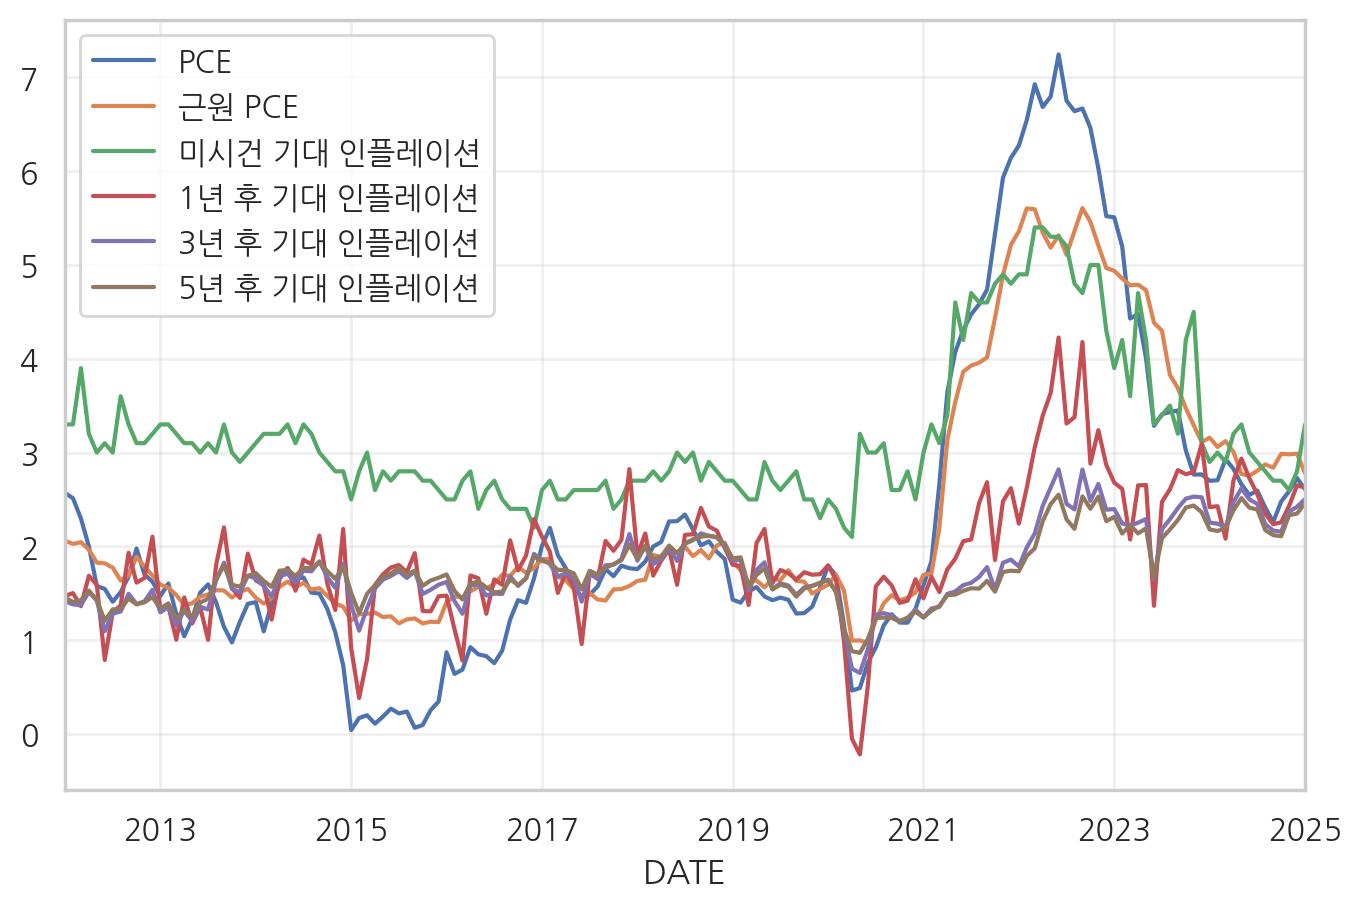

In [ ]:
df_exp1y.plot()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/inf_exp_us.png


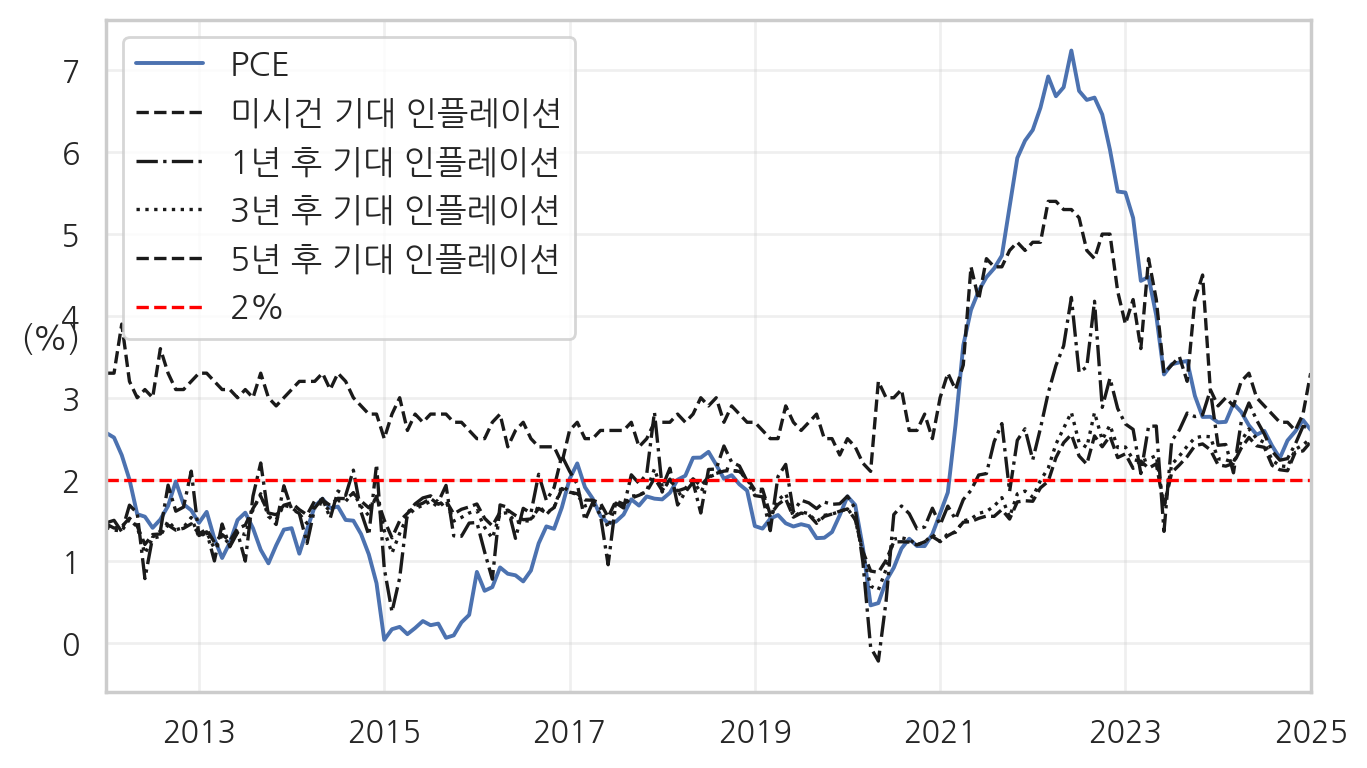

In [ ]:
start_date = 2012
end_date   = 2025

linewidth = 1.2

fig, ax = plt.subplots(figsize=(7,4))

# -----------------------------
# Lines
# -----------------------------
df_exp1y.loc[str(start_date):str(end_date), 'PCE'] \
    .plot(ax=ax, linewidth=1.4, label='PCE')

df_exp1y.loc[str(start_date):str(end_date), '미시건 기대 인플레이션'] \
    .plot(ax=ax, color='k', linestyle='--', linewidth=linewidth,
          label='미시건 기대 인플레이션')

df_exp1y.loc[str(start_date):str(end_date), '1년 후 기대 인플레이션'] \
    .plot(ax=ax, color='k', linestyle='-.', linewidth=linewidth,
          label='1년 후 기대 인플레이션')

df_exp1y.loc[str(start_date):str(end_date), '3년 후 기대 인플레이션'] \
    .plot(ax=ax, color='k', linestyle=':', linewidth=linewidth,
          label='3년 후 기대 인플레이션')

df_exp1y.loc[str(start_date):str(end_date), '5년 후 기대 인플레이션'] \
    .plot(ax=ax, color='k', linestyle='--', linewidth=linewidth,
          label='5년 후 기대 인플레이션')

# -----------------------------
# 2% target line
# -----------------------------
ax.axhline(2, color='red', linestyle='--', linewidth=linewidth,
           label='2%')

# -----------------------------
# Formatting
# -----------------------------
ax.legend(fontsize=12, loc='upper left')
ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.0f}')
)

ax.grid(True)

save_fig('inf_exp_us')
plt.show()

### 테일러 준칙
#### 유효 연방기금금리 vs. 테일러 준칙 금리

In [ ]:
# Federal Funds Effective Rate (FEDFUNDS)
# Real Gross Domestic Product (GDPC1)
# Gross Domestic Product: Implicit Price Deflator (GDPDEF)
# Real Potential Gross Domestic Product (GDPPOT)

var_list = ['FEDFUNDS', 'GDPC1', 'GDPDEF', 'GDPPOT']
start = date(1960,1,1)
end = date(2024,12,31)

df_taylor = pdr.get_data_fred(var_list, start=start, end=end)
print(df_taylor.head())
print(df_taylor.tail(3))

# make it quarterly
df_taylor = df_taylor.dropna()
print(df_taylor.info())

            FEDFUNDS     GDPC1  GDPDEF    GDPPOT
DATE                                            
1960-01-01     3.990 3,517.181  15.428 3,493.326
1960-02-01     3.970       NaN     NaN       NaN
1960-03-01     3.840       NaN     NaN       NaN
1960-04-01     3.920 3,498.246  15.467 3,529.388
1960-05-01     3.850       NaN     NaN       NaN
            FEDFUNDS      GDPC1  GDPDEF     GDPPOT
DATE                                              
2024-10-01     4.830 23,586.542 126.450 23,113.340
2024-11-01     4.640        NaN     NaN        NaN
2024-12-01     4.480        NaN     NaN        NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 1960-01-01 to 2024-10-01
Freq: 3MS
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  260 non-null    float64
 1   GDPC1     260 non-null    float64
 2   GDPDEF    260 non-null    float64
 3   GDPPOT    260 non-null    float64
dtypes: float64(4)
memory usage: 10

In [ ]:
# 인플레이션 계산
df_taylor['inflation'] = 100*df_taylor['GDPDEF'].pct_change(4)

# output gap 계산
df_taylor['output gap'] = 100*(df_taylor['GDPC1']-df_taylor['GDPPOT'])/df_taylor['GDPPOT']

# Taylor rule
alpha_pi = 0.5
alpha_y = 0.5
df_taylor['taylor rule'] = 2 + df_taylor['inflation'] + alpha_pi*(df_taylor['inflation']-2) + alpha_y*df_taylor['output gap']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/ffr_Taylor.png


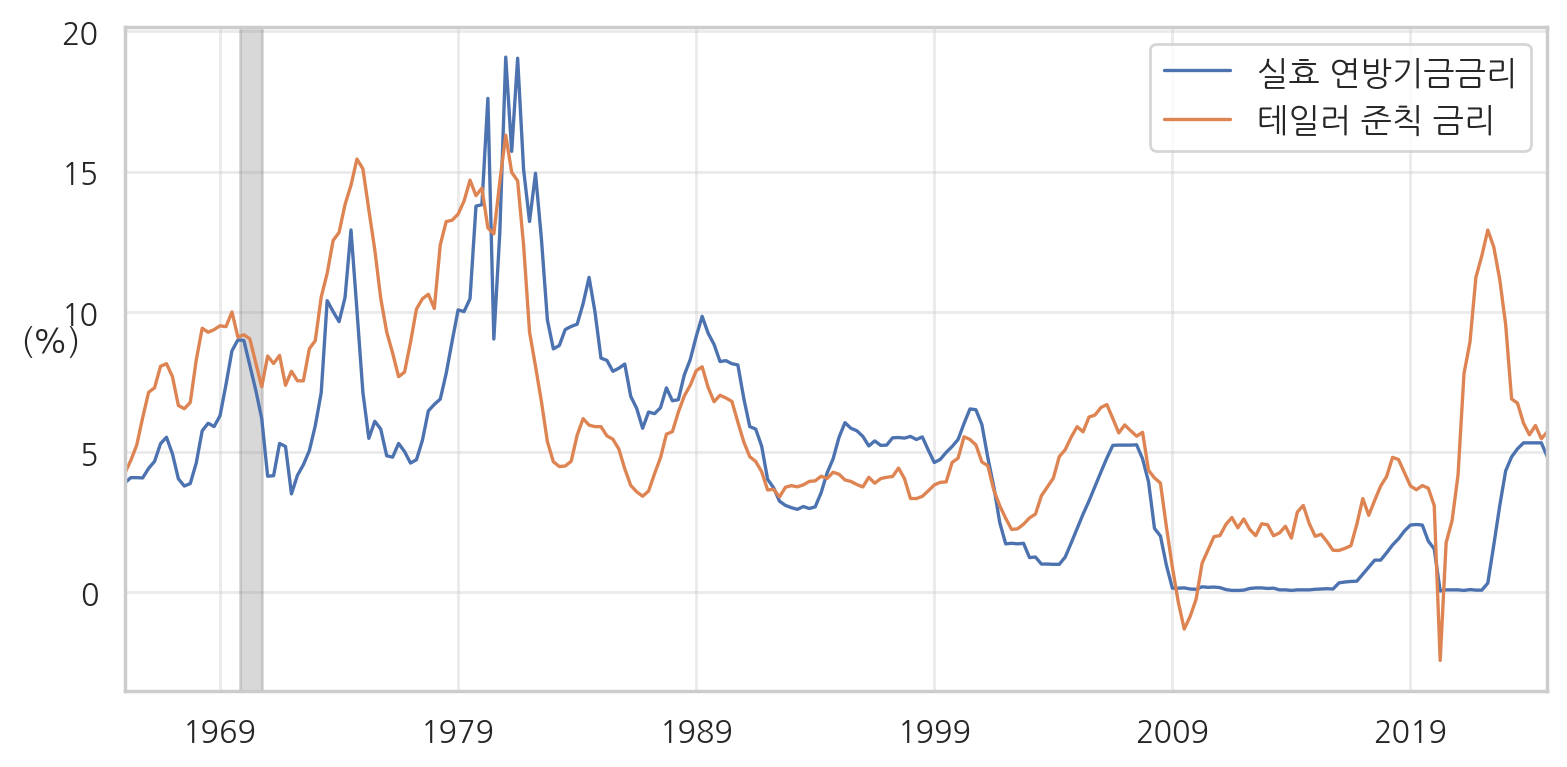

In [ ]:
start_date = 1965
end_date = 2024

fig, ax = plt.subplots(figsize=(8,4))

df_taylor.loc[str(start_date):str(end_date), ['FEDFUNDS','taylor rule']].plot(
    ax=ax, linewidth=1.2
)

ax.legend(
    ['실효 연방기금금리','테일러 준칙 금리'],
    fontsize=12,
    loc='upper right'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

# NBER 경기침체 음영 (분기자료)
plot_nber_recession(ax, NBERq)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('ffr_Taylor')
plt.show()

#### 테일러 vs. 버냉키

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/data/'
filename = 'TaylorRuleData.csv'

df = pd.read_csv(filepath+filename, index_col='date')
df.head()

,GDP Deflator Inflation,PCE Inflation,Core PCE Inflation,Output Gap,actual federal funds rate
date,,,,,
1993:Q1,0.024,0.029,NaN,-0.030,3.040
1993:Q2,0.025,0.028,NaN,-0.029,3.000
1993:Q3,0.025,0.026,NaN,-0.033,3.060
1993:Q4,0.027,0.027,NaN,-0.023,2.990
1994:Q1,0.022,0.022,NaN,-0.015,3.210


In [ ]:
# set parameter values
phi_y1 = 0.5
phi_y2 = 1
phi_pi = 0.5

# set variables
ffr = df['actual federal funds rate']
pi_GDPdef= df['GDP Deflator Inflation']*100
pi_core = df['Core PCE Inflation']*100
y_gap = df['Output Gap ']*100

In [ ]:
# for question (1)
taylor1 = pi_GDPdef + phi_y1*y_gap + phi_pi*(pi_GDPdef-2)+2

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Taylor_Bernanke1.png


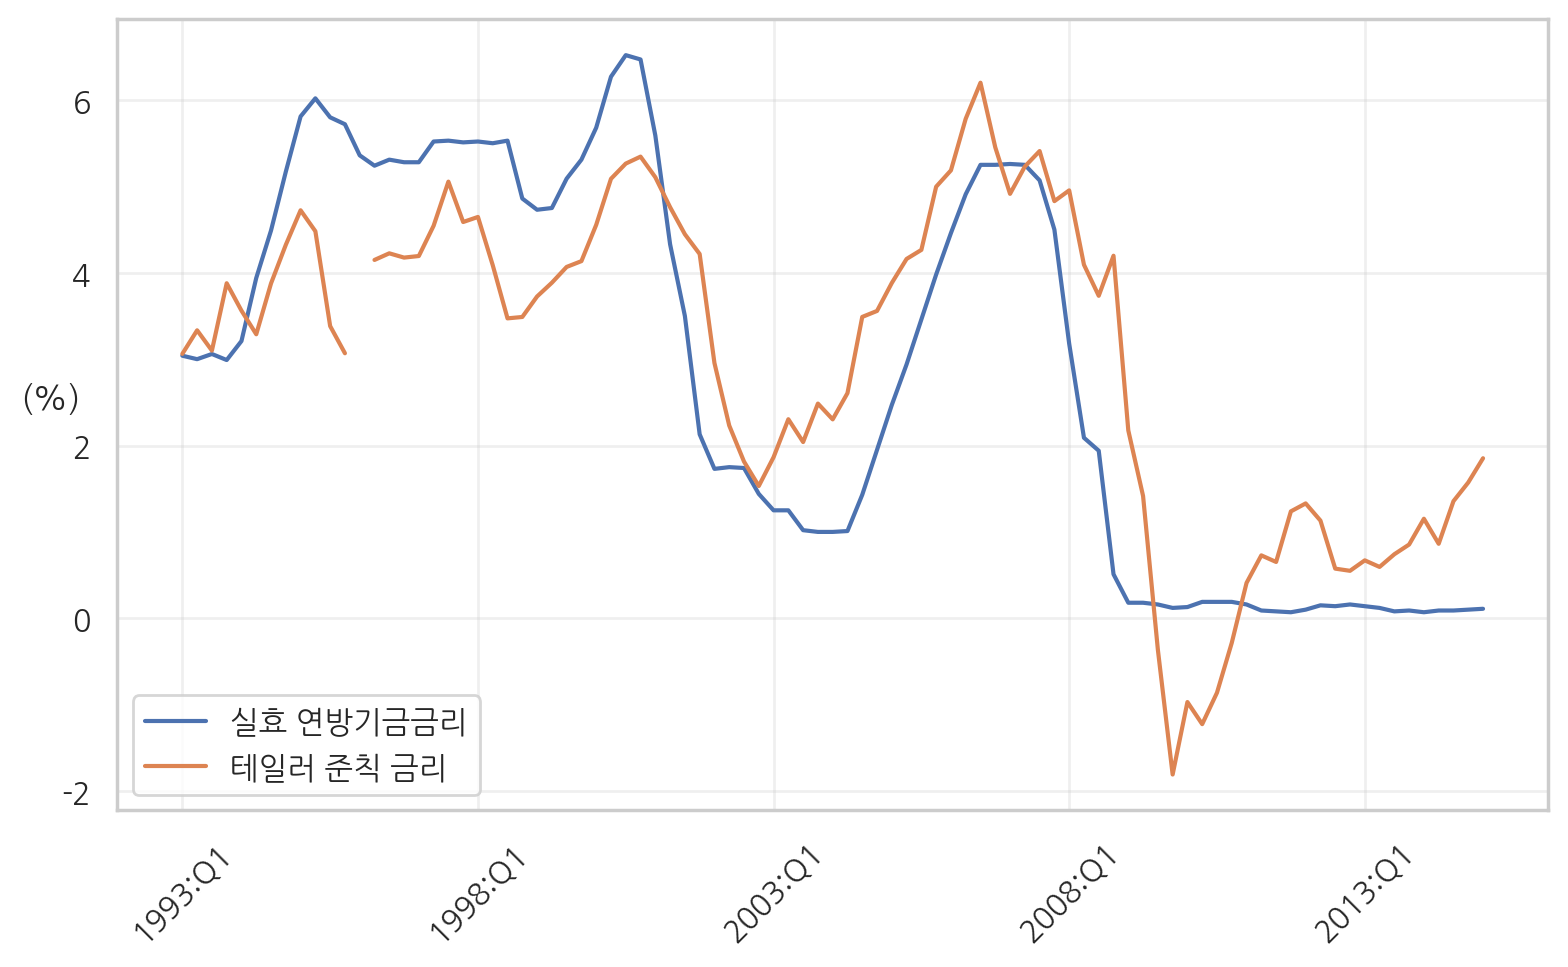

In [ ]:
# for
ffr.plot()
taylor1.plot()

#plt.title('테일러 준칙 금리, 1993-2015')
plt.ylabel('(%)').set_rotation(0)
plt.xlabel('')
#plt.ylim(-4, 8)
plt.grid(True)
plt.legend(['실효 연방기금금리', '테일러 준칙 금리'], loc='lower left')
plt.xticks(rotation=45)

save_fig('Taylor_Bernanke1')
plt.show()

In [ ]:
# for question (2)
taylor2 = pi_core + phi_y2*y_gap + phi_pi*(pi_core -2)+2

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Taylor_Bernanke2.png


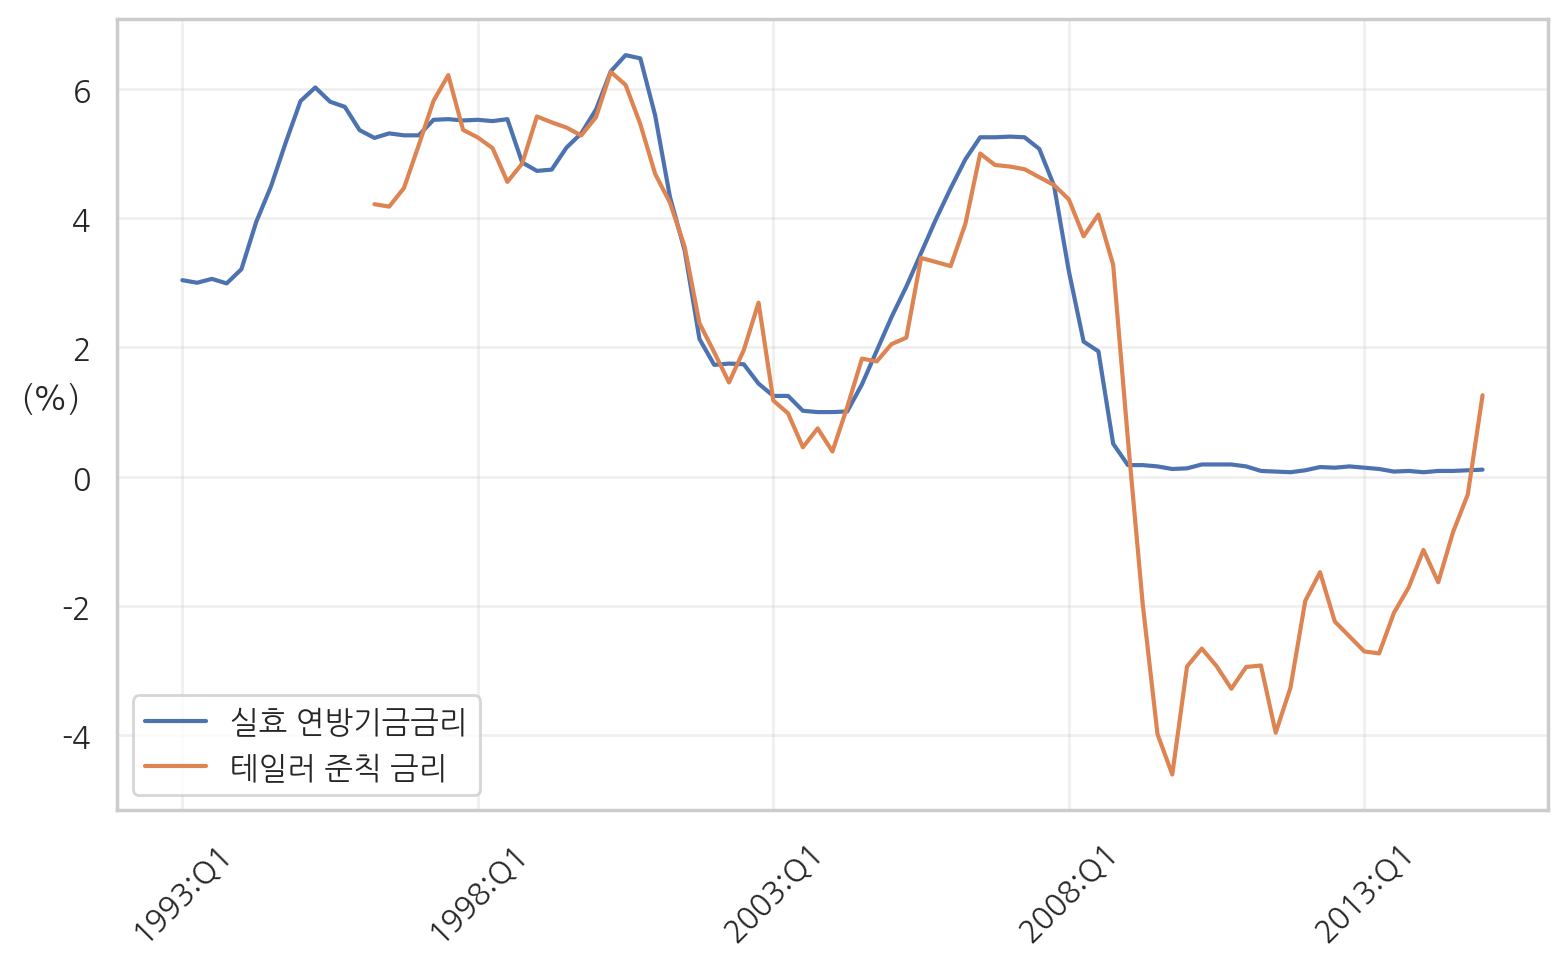

In [ ]:
ffr.plot()
taylor2.plot()

#plt.title('Core PCE inflation, weight on output gap = 1', fontsize=10)
#plt.suptitle('A Modified Taylor Rule')
plt.ylabel('(%)').set_rotation(0)
plt.xlabel('')
#plt.ylim(-4, 8)
plt.grid(True)
plt.legend(['실효 연방기금금리', '테일러 준칙 금리'], loc='lower left')
plt.xticks(rotation=45)

save_fig('Taylor_Bernanke2')
plt.show()

In [ ]:
# for question (3): (2)에서 phi_y를 1대신 0.5로 사용할 경우
taylor3 = pi_core + phi_y1*y_gap + phi_pi*(pi_core -2)+2

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Taylor_Bernanke3.png


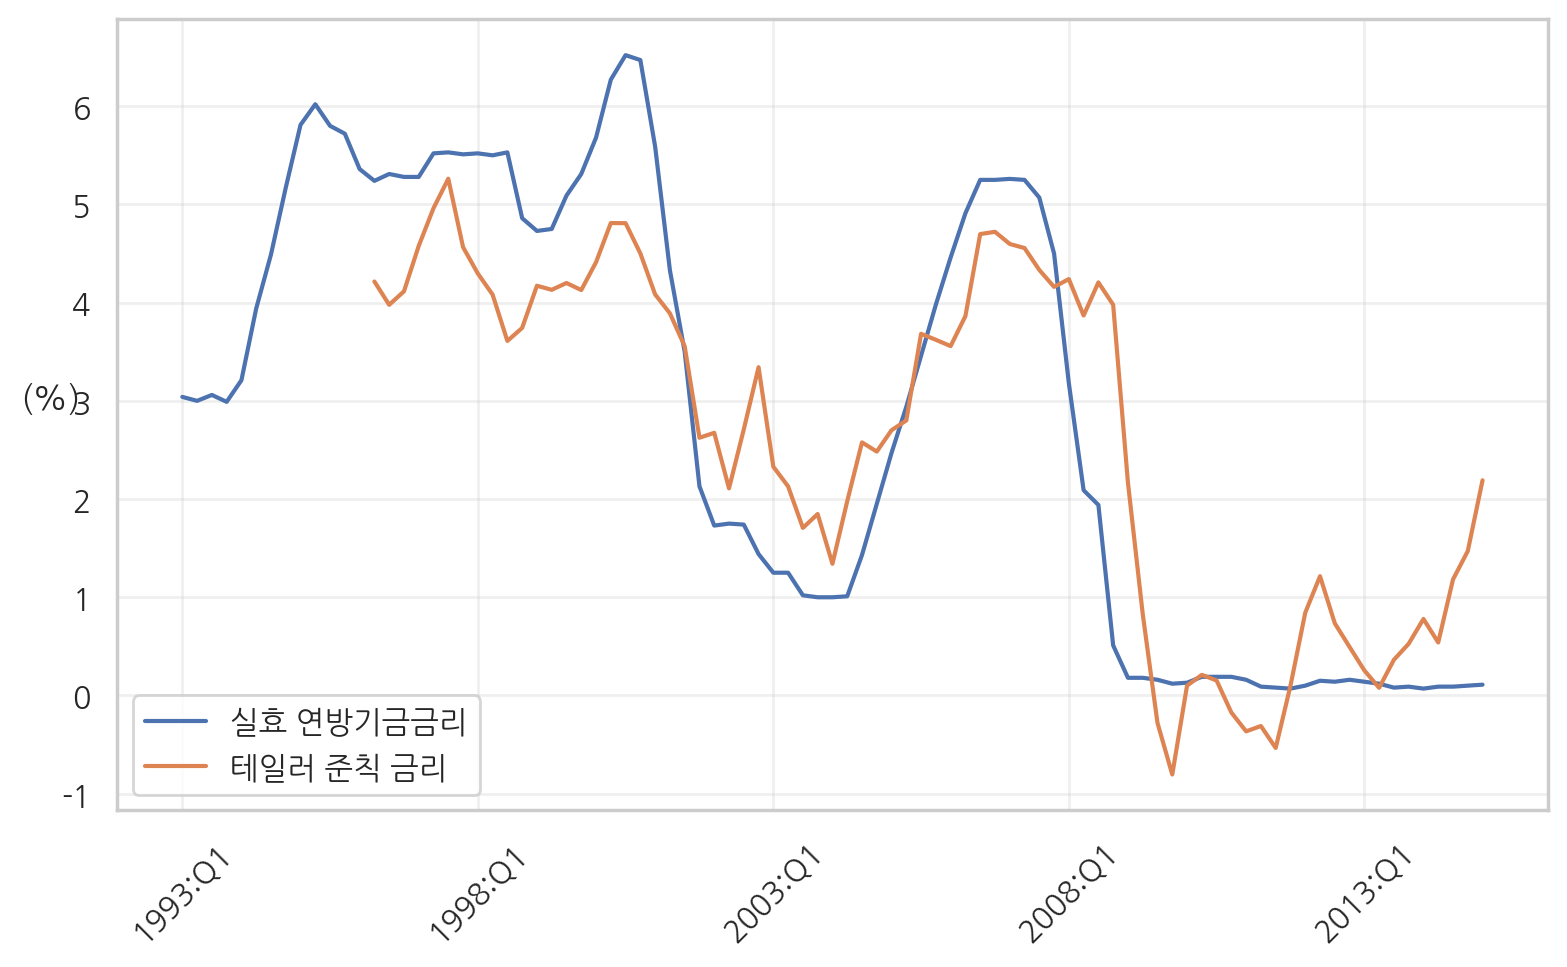

In [ ]:
ffr.plot()
taylor3.plot()

#plt.title('Core PCE inflation, weight on output gap = 1', fontsize=10)
#plt.suptitle('A Modified Taylor Rule')
plt.ylabel('(%)').set_rotation(0)
plt.xlabel('')
#plt.ylim(-4, 8)
plt.grid(True)
plt.legend(['실효 연방기금금리', '테일러 준칙 금리'], loc='lower left')
plt.xticks(rotation=45)

save_fig('Taylor_Bernanke3')
plt.show()